<a href="https://colab.research.google.com/github/BachirZahaf27/NIDS1/blob/main/NIDS2_(4.0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# **Databse**

In [2]:
dataset = pd.read_csv('kddcup.data_10_percent_corrected.csv')

In [3]:
dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64288,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
64289,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
64290,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
64291,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


## **Features:**
 
  

*   **duration:**	 
    length (number of seconds) of the connection				
*   **protocol_type:**	 	 
    type of the protocol, e.g. tcp, udp, etc.					
*   **service:**	 	 
    network service on the destination, e.g., http, telnet, etc.	
*   **flag:**	 	 
    normal or error status of the connection 	
*   **src_bytes:** 	 
    number of data bytes from source to destination			
*   **dst_bytes:**		 
    number of data bytes from destination to source
*   **land:**		 
    1 if connection is from/to the same host/port; 0 otherwise	
*   **wrong_fragment:**		 
    number of “wrong” fragments	
*   **urgent:**		 
    number of urgent packets
*   **hot:**		 
    number of “hot” indicators
*   **num_failed_logins:** 	 
    number of failed login attempts
*   **logged_in:**		 
    11 if successfully logged in; 0 otherwise	
*   **num_compromised:**		 
    number of “compromised” conditions
*   **root_shell:**		 
    1 if root shell is obtained; 0 otherwise	
*   **su_attempted:**		 
    1 if “su root” command attempted; 0 otherwise
*   **num_root:**		 
    number of “root” accesses
*   **num_file_creations:**		 
    number of file creation operations	
*   **num_shells:**		 
    number of shell prompts
*   **num_access_files:**		 
    number of operations on access control files	
*   **num_outbound_cmds:**		 
    number of outbound commands in an ftp session	
*   **is_host_login:**		 
    1 if the login belongs to the “hot” list; 0 otherwise
*   **is_guest_login:**		 
    1 if the login is a “guest”login; 0 otherwise
*   **count:**		 
    number of connections to the same host as the current connection in the past two seconds
*   **srv_count:**		 
    Number of connection to the same service (port number)
*   **serror_rate:**		 
    Percentage of connections that have activated flag (#4) s0,s1,s2 or s3, among the connections aggregated in count (#23)
*   **srv_rerror_rate:**		 
    Percentage of connection that have activated flag (#4) s0,s1,s2 or s3, among the connections aggregated in srv count (#24)
*   **rerror_rate:**		 
    Percentage of connections that have activated flag (#4 )REJ, among the connections aggregated in count (#23)
*   **srv_rerror_rate:** 	 
    Percentage of connections that have activated flag (#4) REJ, among the connections aggregated in srv count (#24)
*   **same_srv_rate:**		 
    Percentage of connections that were to the same services, among the connections aggregated in count (#23)
*   **diff_srv_rate:**		 
    Percentage of connections that were to the different services, among the connections aggregated in count (#23)
*   **srv_count:**		 
    Number of connection to the same service (port number)
*   **srv_diff_host_rate:**		 
    Percentage of connections that were to different destination machines among the connections aggregated in srv count (#24)
*   **dst_host_count:**		 
    Number of connections having the same destination host IP address
*   **dst_host_srv_count:**		 
    Number of connections having same port number
*   **dst_host_same_srv_rate:**		 
    Percentage of connections that were to the same service among
the connections aggregated in dst host count (#32)
*   **dst_host_diff_srv_rate:**		 
    Percentage of connections that were to different service among the connections aggregated in dst host count (#32)
*   **dst_host_same_src_port_rate:**		 
    Percentage of connections that were to the same source port among the connections aggregated in dst host srv count (#33)
*   **dst_host_srv_diff_host_rate:**		 
    Percentage of connections that were to the different destination machines among the connections aggregated in dthtt(#33)
*   **dst_host_serror_rate:**		 
    Percentage of connections that have activated flag (#4) s0,s1,s2 or s3, among the connections aggregated in dst host count (#32)
*   **dst_host_srv_serror_rate:**		 
    Percentage of connections that have activated flag (#4) REJ, among the connections aggregated in dst host count (#32)
*   **dst_host_rerror_rate:**		 
    Percentage of connections that have activated flag (#4) REJ, among the connections aggregated in dst host count (#32)	
*   **dst_host_srv_rerror_rate:**		 
    Percentage of connections that have activated flag (#4) REJ, among the connections aggregated in dst host srv count (#32)
*   **label:**		 
    Attack class label

In [4]:
dataset.rename(columns = {'label':'outcome'}, inplace = True)

## **Analyzing our database**

To analyze our database we need to get the percentage of every possible value in each column, to do that:



*   expand all categories values in each column
*   get number of categories values in each column in the dataset
*   get the percentage of every categories value in each column
*   run the fonction on each column 


In [5]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,\
                int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

analyze(dataset)


64293 rows
** duration:178 (0%)
** protocol_type:[tcp:100.0%]
** service:[http:100.0%]
** flag:[SF:91.06%,REJ:8.33%,S0:0.31%,RSTR:0.14%,RSTO:0.06%,S1:0.06%,S2:0.03%,S3:0.01%]
** src_bytes:435 (0%)
** dst_bytes:10414 (16%)
** land:[0:100.0%]
** wrong_fragment:[0:100.0%]
** urgent:[0:100.0%]
** hot:[0:96.34%,2:3.36%,1:0.28%,4:0.01%,3:0.01%]
** num_failed_logins:[0:100.0%]
** logged_in:[1:91.34%,0:8.66%]
** num_compromised:[0:96.68%,1:3.31%,4:0.01%,2:0.0%]
** root_shell:[0:99.97%,1:0.03%]
** su_attempted:[0:100.0%]
** num_root:[0:100.0%,1:0.0%]
** num_file_creations:[0:100.0%]
** num_shells:[0:100.0%]
** num_access_files:[0:99.5%,1:0.5%]
** num_outbound_cmds:[0:100.0%]
** is_host_login:[0:100.0%]
** is_guest_login:[0:100.0%]
** count:163 (0%)
** srv_count:[1:13.37%,2:8.5%,3:6.33%,4:5.99%,5:5.26%,6:4.75%,7:4.11%,8:3.91%,9:3.51%,10:3.24%,11:3.19%,12:2.85%,13:2.67%,14:2.58%,15:2.28%,16:2.21%,17:1.89%,18:1.88%,19:1.78%,20:1.61%,21:1.49%,22:1.26%,23:1.18%,24:1.16%,25:1.09%,26:0.93%,27:0.86%,2

## **Preprocessing the dataset**

To Preprocess our database we need to :

*   Drop the features that are not required
*   Separate the features and labels
*   Encode the categorical labels into integers

    > To encode the categorical labels we need LabelEncoder function that is used to normalize labels. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels. Fit label encoder. Fit label encoder and return encoded labels.
*   One-hot encoding the labels

    > One hot encoding is a process of converting categorical data variables so they can be provided to machine learning algorithms to improve predictions. One hot encoding is a crucial part of feature engineering for machine learning.

*   Feature scaling the input data


In [6]:
# Drop the features that are not required
dataset = dataset.drop(dataset.columns[[0, 1, 2, 3, 6, 11, 13, 14, 15, 20, 21]], axis=1)

# Separate the features and labels
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Encode the categorical labels into integers
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

# One-hot encoding the labels
onehotencoder = OneHotEncoder(categories='auto')
y = onehotencoder.fit_transform(y.reshape(-1, 1)).toarray()

# Feature scaling the input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

## **Splitting the dataset into train and test sets**
X_train : X irrevocable used to fit the machine learning model.

X_test : X irrevocable used to evaluate the fit machine learning model.

Y_train : Y irrevocable used to fit the machine learning model.

Y_test : Y irrevocable used to evaluate the fit machine learning model.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **CNN Model**

## **Creating CNN Models**

### **Creating CNN Model 1**

Creating a CNN model for a classification problem using Keras layers:


1.   Creates an instance of the Sequential class, which is a Keras model.

2.   Adds a **1D convolutional layer** to the model with **64 filters**, a kernel size of **3**, and a **ReLU** activation function. The input shape is specified as **(X_train.shape[1], 1)** which means that the input data is **1-dimensional** and the number of features is equal to **X_train.shape[1]**.

3.   Adds a max **pooling layer** to the model with a pool size of **2**.

4.   Adds another **1D convolutional layer** to the model with **32 filters**, a kernel size of **3**, and a **ReLU** activation function.

5.   Adds another max **pooling layer** to the model with a pool size of **2**.

6.   **Flattens** the output from the **convolutional layers** into a **1-dimensional** array.

7.   Adds a **fully connected layer** to the model with **128 neurons** and a **ReLU** activation function.

8.   Adds a **dropout layer** to the model with a dropout rate of **0.2**. Dropout is a regularization technique that randomly drops out **(sets to zero)** some of the neurons in the layer during training, **which helps prevent overfitting**.

9.   Adds the **output layer** to the model. The number of neurons in the output layer is **equal** to the number of classes in the problem, which is **y_train.shape[1]**. The activation function used is **softmax**, which produces a probability distribution over the classes.

10.   Compiles the model by specifying the optimizer **(adam)**, loss function **(categorical cross-entropy)**, and evaluation metric **(accuracy)**.

11.   Prints a summary of the model architecture, including the layers, number of parameters, and output shapes.

    > Creates a CNN model with two 1D convolutional layers, two max pooling layers, a fully connected layer, a dropout layer, and an output layer. The model is compiled with the Adam optimizer and categorical cross-entropy loss function, and is evaluated using the accuracy metric.

In [8]:
classifier = Sequential()

# Add convolutional layer
classifier.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add max pooling layer
classifier.add(MaxPooling1D(pool_size=2))

# Add another convolutional layer
classifier.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

# Add max pooling layer
classifier.add(MaxPooling1D(pool_size=2))

# Flatten the output from convolutional layers
classifier.add(Flatten())

# Add fully connected layer
classifier.add(Dense(units=128, activation='relu'))

# Add dropout layer to prevent overfitting
classifier.add(Dropout(rate=0.2))

# Add output layer
classifier.add(Dense(units=y_train.shape[1], activation='softmax'))

# Compile the model
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 14, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 6, 32)            0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 128)               2

### **Creating CNN Model 2**

**Model 2:** Change activation function to LeakyReLU, optimizer to RMSprop, loss function to mean squared error, and increase the dropout rate.

In [9]:
from keras.layers import LeakyReLU
from keras.optimizers import RMSprop

# Model 2
classifier2 = Sequential()

classifier2.add(Conv1D(filters=128, kernel_size=3, activation=LeakyReLU(alpha=0.2), input_shape=(X_train.shape[1], 1)))
classifier2.add(MaxPooling1D(pool_size=2))
classifier2.add(Conv1D(filters=64, kernel_size=3, activation=LeakyReLU(alpha=0.2)))
classifier2.add(MaxPooling1D(pool_size=2))
classifier2.add(Flatten())
classifier2.add(Dense(units=256, activation=LeakyReLU(alpha=0.2)))
classifier2.add(Dropout(rate=0.4))
classifier2.add(Dense(units=y_train.shape[1], activation='softmax'))

classifier2.compile(optimizer=RMSprop(), loss='mean_squared_error', metrics=['accuracy'])
classifier2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 28, 128)           512       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 14, 128)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 12, 64)            24640     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 6, 64)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 384)               0         
                                                                 
 dense_2 (Dense)             (None, 256)              

### **Ceating CNN Model 3**
**Model 3:** Change activation function to tanh, optimizer to SGD, loss function to binary cross-entropy, and decrease the dropout rate.

In [10]:
from keras.optimizers import SGD

# Model 3
classifier3 = Sequential()

classifier3.add(Conv1D(filters=32, kernel_size=3, activation='tanh', input_shape=(X_train.shape[1], 1)))
classifier3.add(MaxPooling1D(pool_size=2))
classifier3.add(Conv1D(filters=16, kernel_size=3, activation='tanh'))
classifier3.add(MaxPooling1D(pool_size=2))
classifier3.add(Flatten())
classifier3.add(Dense(units=64, activation='tanh'))
classifier3.add(Dropout(rate=0.1))
classifier3.add(Dense(units=y_train.shape[1], activation='softmax'))

classifier3.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])
classifier3.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 28, 32)            128       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 14, 32)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 12, 16)            1552      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 6, 16)            0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 96)                0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In these examples, I changed the activation function to LeakyReLU and tanh, optimizer to RMSprop and SGD, loss function to mean squared error and binary cross-entropy, and adjusted the dropout rate. These changes can influence the model's learning behavior and potentially impact accuracy. Remember to select appropriate activation functions, optimizers, and loss functions based on your specific task and dataset characteristics.

Feel free to modify other parameters or explore different combinations to further investigate their effects on model performance.

## **Training the CNN Models**

Train a machine learning model using a deep learning neural network called "classifier" on some input data **X_train** with corresponding output data **y_train**. 

The purpose of the neural network is to predict the output values **(y)** for new input values **(X)** that it has not seen before.

The **"fit"** method of the **"classifier"** object is used to train the neural network.

The **"fit"** method takes in the input data and output data along with some other parameters:

 

*   **X_train.reshape(X_train.shape[0], X_train.shape[1], 1)** - This reshapes the input data to a 3D array. The first dimension is the number of training examples, the second dimension is the length of each input sequence, and the third dimension is the number of features (in this case, there is only one feature). This is necessary for the input shape of the neural network.

*   **y_train** - This is the output data that corresponds to the input data.

*   **epochs=10** - This specifies the number of times the entire dataset will be passed through the neural network during training.

*   **batch_size=128** - This specifies the number of samples that will be used in each training iteration. In this case, the training data will be divided into batches of 128 samples and the neural network will be trained on each batch.

*   **validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)** - This specifies the validation data, which is used to evaluate the performance of the neural network during training. The validation data is also reshaped to a 3D array.

>The output of the **"fit"** method is stored in the **"history"** variable. This object contains information about the performance of the neural network during training, such as the training and validation loss and accuracy for each epoch.









### **Training the CNN model 1**

In [11]:
import time
# Start the timer
start_time = time.time()
# Train cnn model 1
history = classifier.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=128, validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test))
# End the timer
end_time = time.time()
execution_time1 = end_time - start_time

# Print Execution time
print("------------------------------------------")
print("Execution time:", execution_time1, "seconds")


Epoch 1/10
352/352 [==============================] - 6s 14ms/step - loss: 0.1061 - accuracy: 0.9902 - val_loss: 0.0113 - val_accuracy: 0.9983
Epoch 2/10
352/352 [==============================] - 5s 15ms/step - loss: 0.0060 - accuracy: 0.9990 - val_loss: 0.0035 - val_accuracy: 0.9995
Epoch 3/10
352/352 [==============================] - 5s 14ms/step - loss: 0.0031 - accuracy: 0.9995 - val_loss: 0.0026 - val_accuracy: 0.9995
Epoch 4/10
352/352 [==============================] - 5s 14ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9997
Epoch 5/10
352/352 [==============================] - 6s 17ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0015 - val_accuracy: 0.9998
Epoch 6/10
352/352 [==============================] - 5s 13ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0011 - val_accuracy: 0.9998
Epoch 7/10
352/352 [==============================] - 6s 16ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0020 - val_accuracy: 0.9997

### **Training the CNN model 2**

In [12]:
import time
# Start the timer
start_time = time.time()
# Train cnn model 2
history2 = classifier2.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=128, validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test))
# End the timer
end_time = time.time()
execution_time2 = end_time - start_time

# Print Execution time
print("------------------------------------------")
print("Execution time:", execution_time2, "seconds")

Epoch 1/10
352/352 [==============================] - 11s 30ms/step - loss: 0.0115 - accuracy: 0.9594 - val_loss: 0.0104 - val_accuracy: 0.9637
Epoch 2/10
352/352 [==============================] - 10s 29ms/step - loss: 0.0108 - accuracy: 0.9621 - val_loss: 0.0104 - val_accuracy: 0.9637
Epoch 3/10
352/352 [==============================] - 12s 33ms/step - loss: 0.0020 - accuracy: 0.9930 - val_loss: 9.0342e-04 - val_accuracy: 0.9968
Epoch 4/10
352/352 [==============================] - 10s 29ms/step - loss: 0.0011 - accuracy: 0.9961 - val_loss: 7.9705e-04 - val_accuracy: 0.9972
Epoch 5/10
352/352 [==============================] - 10s 29ms/step - loss: 0.0010 - accuracy: 0.9964 - val_loss: 8.3085e-04 - val_accuracy: 0.9970
Epoch 6/10
352/352 [==============================] - 9s 25ms/step - loss: 0.0010 - accuracy: 0.9964 - val_loss: 7.8495e-04 - val_accuracy: 0.9973
Epoch 7/10
352/352 [==============================] - 10s 28ms/step - loss: 0.0010 - accuracy: 0.9964 - val_loss: 7.9862e

### **Training the CNN model 3**

In [13]:
import time
# Start the timer
start_time = time.time()
# Train cnn model 3
history3 = classifier3.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=128, validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test))
# End the timer
end_time = time.time()
execution_time3 = end_time - start_time

# Print Execution time
print("------------------------------------------")
print("Execution time:", execution_time3, "seconds")

Epoch 1/10
352/352 [==============================] - 5s 12ms/step - loss: 0.3584 - accuracy: 0.8947 - val_loss: 0.1149 - val_accuracy: 0.9637
Epoch 2/10
352/352 [==============================] - 5s 13ms/step - loss: 0.0820 - accuracy: 0.9621 - val_loss: 0.0605 - val_accuracy: 0.9637
Epoch 3/10
352/352 [==============================] - 4s 12ms/step - loss: 0.0567 - accuracy: 0.9621 - val_loss: 0.0486 - val_accuracy: 0.9637
Epoch 4/10
352/352 [==============================] - 5s 14ms/step - loss: 0.0475 - accuracy: 0.9621 - val_loss: 0.0416 - val_accuracy: 0.9637
Epoch 5/10
352/352 [==============================] - 4s 11ms/step - loss: 0.0411 - accuracy: 0.9621 - val_loss: 0.0360 - val_accuracy: 0.9637
Epoch 6/10
352/352 [==============================] - 4s 11ms/step - loss: 0.0356 - accuracy: 0.9621 - val_loss: 0.0309 - val_accuracy: 0.9637
Epoch 7/10
352/352 [==============================] - 4s 11ms/step - loss: 0.0305 - accuracy: 0.9621 - val_loss: 0.0264 - val_accuracy: 0.9637

## **Evaluating the model**

The "evaluate" method takes the following parameters:

*  **X_test.reshape((X_test.shape[0], X_test.shape[1], 1))** - This reshapes the test input data to the same 3D array format used during the training. The first dimension is the number of test examples, the second dimension is the length of each input sequence, and the third dimension is the number of features (in this case, there is only one feature).

*  **y_test** - This is the corresponding output data for the test input data.

*  **verbose=0** - This specifies the level of verbosity of the evaluation process. A value of 0 means that no progress messages will be displayed during the evaluation.

>The output of the "evaluate" method is stored in the "score" variable. The "score" variable contains a scalar value that represents the overall performance of the model on the test data. The specific metric used for evaluation depends on the type of model and the problem being solved. For example, if the model is a classifier, the metric might be accuracy, precision, or recall. If the model is a regressor, the metric might be mean squared error or mean absolute error.



### **Evaluating the accuracy and the loss of the 3 models**

Model 1 - Test loss: 0.12%
Model 1 - Test accuracy: 99.99%
Model 2 - Test loss: 0.08%
Model 2 - Test accuracy: 99.72%
Model 3 - Test loss: 1.72%
Model 3 - Test accuracy: 99.57%


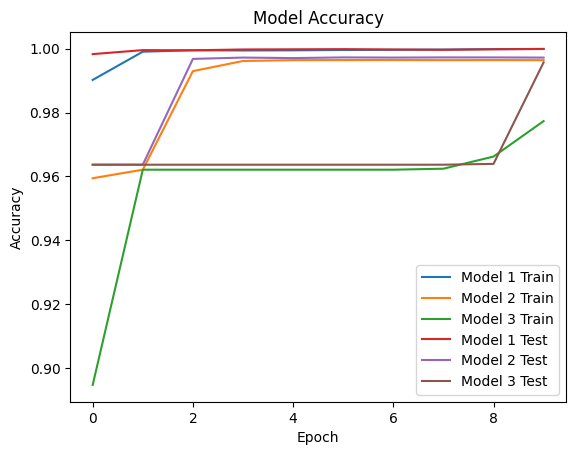

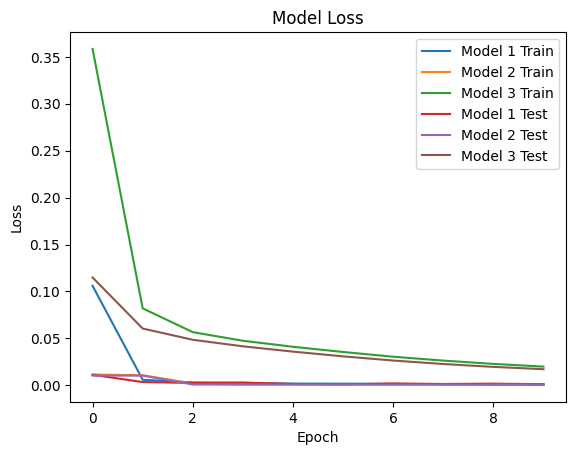

In [14]:
# Plot the accuracy and loss curves
import matplotlib.pyplot as plt
# Get the Score of evaluating CNN 1
score1 = classifier.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test, verbose=0)
print('Model 1 - Test loss: {:.2%}'.format(score1[0]))  # Display test loss as a percentage
print('Model 1 - Test accuracy: {:.2%}'.format(score1[1]))  # Display test accuracy as a percentage

# Get the Score of evaluating CNN 2
score2 = classifier2.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test, verbose=0)
print('Model 2 - Test loss: {:.2%}'.format(score2[0]))  # Display test loss as a percentage
print('Model 2 - Test accuracy: {:.2%}'.format(score2[1]))  # Display test accuracy as a percentage

# Get the Score of evaluating CNN 3
score3 = classifier3.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test, verbose=0)
print('Model 3 - Test loss: {:.2%}'.format(score3[0]))  # Display test loss as a percentage
print('Model 3 - Test accuracy: {:.2%}'.format(score3[1]))  # Display test accuracy as a percentage


# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model 1 Train', 'Model 2 Train', 'Model 3 Train', 'Model 1 Test', 'Model 2 Test', 'Model 3 Test'], loc='lower right')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Model 1 Train', 'Model 2 Train', 'Model 3 Train', 'Model 1 Test', 'Model 2 Test', 'Model 3 Test'], loc='upper right')
plt.show()

### **Evaluating the accuracy of the 3 models**

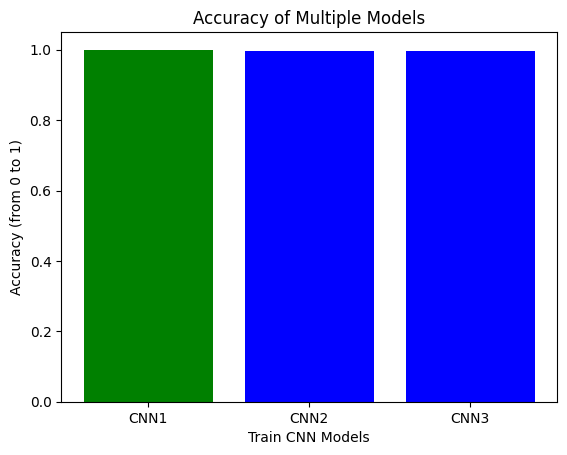

In [15]:
# Plot the accuracy
accuracy = [score1[1], score2[1], score3[1]]
labels = ['CNN1', 'CNN2', 'CNN3']
colors = ['blue', 'blue', 'blue']  # Set the color for each bar
# Find the index of the model with the highest accuracy
max_accuracy_index = accuracy.index(max(accuracy))
colors[max_accuracy_index] = 'green'  # Set a different color for the bar with the highest accuracy
plt.bar(labels, accuracy, color=colors)
plt.xlabel('Train CNN Models')
plt.ylabel('Accuracy (from 0 to 1)')
plt.title('Accuracy of Multiple Models')
plt.show()



### **Evaluating the Excution time of the 3 models**



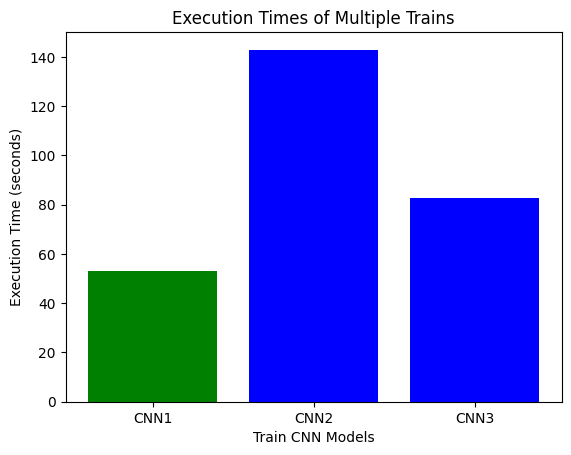

In [16]:
# Plot the execution times
execution_times = [execution_time1, execution_time2, execution_time3]
labels = ['CNN1', 'CNN2', 'CNN3']
colors = ['blue', 'blue', 'blue']  # Set the color for each bar

# Find the index of the model with the lowest execution time
min_execution_times_index = execution_times.index(min(execution_times))
colors[min_execution_times_index] = 'green'  # Set a different color for the bar with the execution time

plt.bar(labels, execution_times, color=colors)
plt.xlabel('Train CNN Models')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Times of Multiple Trains')
plt.show()

In [17]:
classifier.save('the_best_cnn_model.h5')

# **Test the best CNN Model**

## **TEST 1**

### **Create the test example 1**

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
database2 = {
    'duration': [0],  # Placeholder value or actual value for duration
    'protocol_type': ['tcp'],  # Placeholder value or actual value for protocol_type
    'service': ['http'],  # Placeholder value or actual value for service
    'flag': ['SF'],  # Placeholder value or actual value for flag
    'src_bytes': [943],
    'dst_bytes': [0],
    'land': [0],  # Placeholder value or actual value for land
    'wrong_fragment': [0],
    'urgent': [0],
    'hot': [0],
    'num_failed_logins': [0],
    'logged_in': [0],  # Placeholder value or actual value for logged_in
    'num_compromised': [0],
    'root_shell': [0],  # Placeholder value or actual value for root_shell
    'su_attempted': [0],  # Placeholder value or actual value for su_attempted
    'num_root': [0],  # Placeholder value or actual value for num_root
    'num_file_creations': [0],
    'num_shells': [0],
    'num_access_files': [0],
    'num_outbound_cmds': [0],
    'is_host_login': [0],  # Placeholder value or actual value for is_host_login
    'is_guest_login': [0],  # Placeholder value or actual value for is_guest_login
    'count': [87],
    'srv_count': [87],
    'serror_rate': [1.0],
    'srv_serror_rate': [1.0],
    'rerror_rate': [0.0],
    'srv_rerror_rate': [0.0],
    'same_srv_rate': [1.0],
    'diff_srv_rate': [0.0],
    'srv_diff_host_rate': [0.0],
    'dst_host_count': [255],
    'dst_host_srv_count': [255],
    'dst_host_same_srv_rate': [1.0],
    'dst_host_diff_srv_rate': [0.0],
    'dst_host_same_src_port_rate': [0.0],
    'dst_host_srv_diff_host_rate': [0.0],
    'dst_host_serror_rate': [1.0],
    'dst_host_srv_serror_rate': [1.0],
    'dst_host_rerror_rate': [0.0],
    'dst_host_srv_rerror_rate': [0.0],
    'outcome': ['smurf.']
}

df = pd.DataFrame(database2)

### **Prepare the test example 1**

In [19]:
df = pd.DataFrame(database2)
# Drop the features that are not required
df = df.drop(df.columns[[0, 1, 2, 3, 6, 11, 13, 14, 15, 20, 21]], axis=1)

# Separate the features and labels
X2 = df.iloc[:, :-1].values
y2 = df.iloc[:, -1].values

# Encode the categorical labels into integers
label_encoder_y2 = LabelEncoder()
y2 = label_encoder_y2.fit_transform(y2.ravel())

# One-hot encoding the labels
onehotencoder = OneHotEncoder(categories='auto')
y2 = onehotencoder.fit_transform(y2.reshape(-1, 1)).toarray()

# Feature scaling the input data
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

# Reshape the modified example to match the original input shape
X2_reshaped = X2.reshape((1, 30, 1))

### **Testing the example 1** 

In [20]:
import time
start_time = time.time()
# Make predictions on the modified example
predictions = classifier.predict(X2_reshaped)

# Decode the one-hot encoded predictions
# Reshape the predictions array
predictions_reshaped = predictions.argmax(axis=1).reshape(-1, 1)

# Inverse transform the predictions
decoded_predictions = label_encoder_y2.inverse_transform(onehotencoder.inverse_transform(predictions_reshaped))

intrusion_types = ['neptune.', 'back.', 'phf.', 'ipsweep.', 'portsweep.', 'satan.', 'smurf.']
true_labels = label_encoder_y2.inverse_transform(y2.argmax(axis=1).reshape(-1, 1))
# Calculate TP, TN, FP, FN
TP = np.sum(np.isin(decoded_predictions, intrusion_types) & np.isin(true_labels, intrusion_types))
TN = np.sum(~np.isin(decoded_predictions, intrusion_types) & ~np.isin(true_labels, intrusion_types))
FP = np.sum(np.isin(decoded_predictions, intrusion_types) & ~np.isin(true_labels, intrusion_types))
FN = np.sum(~np.isin(decoded_predictions, intrusion_types) & np.isin(true_labels, intrusion_types))
# end the time of execution
end_time = time.time()
execution_time1 = end_time - start_time
# Print the predictions
print("Predictions:", decoded_predictions)
# Print the time of execution
print("Execution time:", execution_time1, "seconds")


1/1 [==============================] - 0s 132ms/step
Predictions: ['smurf.']
Execution time: 0.19463396072387695 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## **TEST 2**

### **Create the test example 2**

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Define the attack example
database3 = {
    'duration': [0],
    'protocol_type': ['icmp'],
    'service': ['eco_i'],
    'flag': ['OTH'],
    'src_bytes': [1032],
    'dst_bytes': [0],
    'land': [0],
    'wrong_fragment': [0],
    'urgent': [0],
    'hot': [0],
    'num_failed_logins': [0],
    'logged_in': [0],
    'num_compromised': [0],
    'root_shell': [0],
    'su_attempted': [0],
    'num_root': [0],
    'num_file_creations': [0],
    'num_shells': [0],
    'num_access_files': [0],
    'num_outbound_cmds': [0],
    'is_host_login': [0],
    'is_guest_login': [0],
    'count': [234],
    'srv_count': [78],
    'serror_rate': [0.0],
    'srv_serror_rate': [0.0],
    'rerror_rate': [1.0],
    'srv_rerror_rate': [1.0],
    'same_srv_rate': [0.34],
    'diff_srv_rate': [0.12],
    'srv_diff_host_rate': [0.01],
    'dst_host_count': [10],
    'dst_host_srv_count': [2],
    'dst_host_same_srv_rate': [0.2],
    'dst_host_diff_srv_rate': [0.8],
    'dst_host_same_src_port_rate': [0.0],
    'dst_host_srv_diff_host_rate': [0.0],
    'dst_host_serror_rate': [0.0],
    'dst_host_srv_serror_rate': [0.0],
    'dst_host_rerror_rate': [1.0],
    'dst_host_srv_rerror_rate': [1.0],
    'outcome': ['neptune.']
}

# Create a DataFrame from the example
df3 = pd.DataFrame(database3)

### **Prepare the test example 2**

In [22]:
# Drop the features that are not required
df3 = df3.drop(df3.columns[[0, 1, 2, 3, 6, 11, 13, 14, 15, 20, 21]], axis=1)

# Separate the features and labels
X3 = df3.iloc[:, :-1].values
y3 = df3.iloc[:, -1].values

# Encode the categorical labels into integers
label_encoder_y3 = LabelEncoder()
y3 = label_encoder_y3.fit_transform(y3.ravel())

# One-hot encoding the labels
onehotencoder = OneHotEncoder(categories='auto')
y3 = onehotencoder.fit_transform(y3.reshape(-1, 1)).toarray()

# Feature scaling the input data
scaler = StandardScaler()
X3 = scaler.fit_transform(X3)

# Reshape the modified example to match the original input shape
X3_reshaped = X3.reshape((1, 30, 1))

### **Testing the example 2** 

In [23]:
import time
start_time = time.time()

# Make predictions on the modified example
predictions3 = classifier.predict(X3_reshaped)

# Decode the one-hot encoded predictions
# Reshape the predictions array
predictions_reshaped3 = predictions3.argmax(axis=1).reshape(-1, 1)

# Inverse transform the predictions
decoded_predictions3 = label_encoder_y3.inverse_transform(onehotencoder.inverse_transform(predictions_reshaped3))
# Calculate TP, TN, FP, FN
intrusion_types = ['neptune.', 'back.', 'phf.', 'ipsweep.', 'portsweep.', 'satan.', 'smurf.']
true_labels = label_encoder_y3.inverse_transform(y3.argmax(axis=1).reshape(-1, 1))

TP = np.sum(np.isin(decoded_predictions3, intrusion_types) & np.isin(true_labels, intrusion_types))
TN = np.sum(~np.isin(decoded_predictions3, intrusion_types) & ~np.isin(true_labels, intrusion_types))
FP = np.sum(np.isin(decoded_predictions3, intrusion_types) & ~np.isin(true_labels, intrusion_types))
FN = np.sum(~np.isin(decoded_predictions3, intrusion_types) & np.isin(true_labels, intrusion_types))

# Print the results
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)
# End the time of execution
end_time = time.time()
execution_time3 = end_time - start_time

# Print the predictions
print("Predictions:", decoded_predictions3)

# Print the time of execution
print("Execution time:", execution_time2, "seconds")

1/1 [==============================] - 0s 21ms/step
True Positive (TP): 1
True Negative (TN): 0
False Positive (FP): 0
False Negative (FN): 0
Predictions: ['neptune.']
Execution time: 142.88423132896423 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## **TEST 3**

### **Create the test example 3**

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Define the normal example
database4 = {
    'duration': [0],
    'protocol_type': ['tcp'],
    'service': ['http'],
    'flag': ['SF'],
    'src_bytes': [500],
    'dst_bytes': [1500],
    'land': [0],
    'wrong_fragment': [0],
    'urgent': [0],
    'hot': [0],
    'num_failed_logins': [0],
    'logged_in': [1],
    'num_compromised': [0],
    'root_shell': [0],
    'su_attempted': [0],
    'num_root': [0],
    'num_file_creations': [0],
    'num_shells': [0],
    'num_access_files': [0],
    'num_outbound_cmds': [0],
    'is_host_login': [0],
    'is_guest_login': [0],
    'count': [25],
    'srv_count': [25],
    'serror_rate': [0.0],
    'srv_serror_rate': [0.0],
    'rerror_rate': [0.0],
    'srv_rerror_rate': [0.0],
    'same_srv_rate': [1.0],
    'diff_srv_rate': [0.0],
    'srv_diff_host_rate': [0.0],
    'dst_host_count': [255],
    'dst_host_srv_count': [255],
    'dst_host_same_srv_rate': [1.0],
    'dst_host_diff_srv_rate': [0.0],
    'dst_host_same_src_port_rate': [0.0],
    'dst_host_srv_diff_host_rate': [0.0],
    'dst_host_serror_rate': [0.0],
    'dst_host_srv_serror_rate': [0.0],
    'dst_host_rerror_rate': [0.0],
    'dst_host_srv_rerror_rate': [0.0],
    'outcome': ['normal.']
}

# Create a DataFrame from the example
df4 = pd.DataFrame(database4)


### **Prepare the test example 3**

In [25]:
# Drop the features that are not required
df4 = df4.drop(df4.columns[[0, 1, 2, 3, 6, 11, 13, 14, 15, 20, 21]], axis=1)

# Separate the features and labels
X4 = df4.iloc[:, :-1].values
y4 = df4.iloc[:, -1].values

# Encode the categorical labels into integers
label_encoder_y4 = LabelEncoder()
y4 = label_encoder_y4.fit_transform(y4.ravel())

# One-hot encoding the labels
onehotencoder = OneHotEncoder(categories='auto')
y4 = onehotencoder.fit_transform(y4.reshape(-1, 1)).toarray()

# Feature scaling the input data
scaler = StandardScaler()
X4 = scaler.fit_transform(X4)

# Reshape the modified example to match the original input shape
X4_reshaped = X4.reshape((1, 30, 1))


### **Testing the example 3** 

In [26]:
import time
start_time = time.time()

# Make predictions on the modified example
predictions4 = classifier.predict(X4_reshaped)

# Decode the one-hot encoded predictions
predictions_reshaped4 = predictions4.argmax(axis=1).reshape(-1, 1)

# Inverse transform the predictions
decoded_predictions4 = label_encoder_y4.inverse_transform(onehotencoder.inverse_transform(predictions_reshaped4))

# Calculate TP, TN, FP, FN
intrusion_types = ['neptune.', 'back.', 'phf.', 'ipsweep.', 'portsweep.', 'satan.', 'smurf.']
true_labels = label_encoder_y4.inverse_transform(y4.argmax(axis=1).reshape(-1, 1))

TP = np.sum(np.isin(decoded_predictions4, intrusion_types) & np.isin(true_labels, intrusion_types))
TN = np.sum(~np.isin(decoded_predictions4, intrusion_types) & ~np.isin(true_labels, intrusion_types))
FP = np.sum(np.isin(decoded_predictions4, intrusion_types) & ~np.isin(true_labels, intrusion_types))
FN = np.sum(~np.isin(decoded_predictions4, intrusion_types) & np.isin(true_labels, intrusion_types))

# Print the results
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)
# End the time of execution
end_time = time.time()
execution_time3 = end_time - start_time

# Print the predictions
print("Predictions:", decoded_predictions4)

# Print the time of execution
print("Execution time:", execution_time3, "seconds")

1/1 [==============================] - 0s 22ms/step
True Positive (TP): 0
True Negative (TN): 1
False Positive (FP): 0
False Negative (FN): 0
Predictions: ['normal.']
Execution time: 0.07784557342529297 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
# Calculate TP, TN, FP, FN
intrusion_types = ['normal.', 'neptune.', 'back.', 'phf.', 'ipsweep.', 'portsweep.', 'satan.', 'smurf.']
true_labels = label_encoder_y4.inverse_transform(y2.argmax(axis=1).reshape(-1, 1))

TP = np.sum(np.isin(decoded_predictions4, intrusion_types) & np.isin(true_labels, intrusion_types))
TN = np.sum(~np.isin(decoded_predictions4, intrusion_types) & ~np.isin(true_labels, intrusion_types))
FP = np.sum(np.isin(decoded_predictions4, intrusion_types) & ~np.isin(true_labels, intrusion_types))
FN = np.sum(~np.isin(decoded_predictions4, intrusion_types) & np.isin(true_labels, intrusion_types))
# Print the results
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

# Print the predictions
print("Predictions:", decoded_predictions4)


True Positive (TP): 1
True Negative (TN): 0
False Positive (FP): 0
False Negative (FN): 0
Predictions: ['normal.']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# example 2
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Define the attack example
database3 = {
    'duration': [0],
    'protocol_type': ['icmp'],
    'service': ['eco_i'],
    'flag': ['OTH'],
    'src_bytes': [1032],
    'dst_bytes': [0],
    'land': [0],
    'wrong_fragment': [0],
    'urgent': [0],
    'hot': [0],
    'num_failed_logins': [0],
    'logged_in': [0],
    'num_compromised': [0],
    'root_shell': [0],
    'su_attempted': [0],
    'num_root': [0],
    'num_file_creations': [0],
    'num_shells': [0],
    'num_access_files': [0],
    'num_outbound_cmds': [0],
    'is_host_login': [0],
    'is_guest_login': [0],
    'count': [234],
    'srv_count': [78],
    'serror_rate': [0.0],
    'srv_serror_rate': [0.0],
    'rerror_rate': [1.0],
    'srv_rerror_rate': [1.0],
    'same_srv_rate': [0.34],
    'diff_srv_rate': [0.12],
    'srv_diff_host_rate': [0.01],
    'dst_host_count': [10],
    'dst_host_srv_count': [2],
    'dst_host_same_srv_rate': [0.2],
    'dst_host_diff_srv_rate': [0.8],
    'dst_host_same_src_port_rate': [0.0],
    'dst_host_srv_diff_host_rate': [0.0],
    'dst_host_serror_rate': [0.0],
    'dst_host_srv_serror_rate': [0.0],
    'dst_host_rerror_rate': [1.0],
    'dst_host_srv_rerror_rate': [1.0],
    'outcome': ['neptune.']
}

# Create a DataFrame from the example
df3 = pd.DataFrame(database3)

# Drop the features that are not required
df3 = df3.drop(df3.columns[[0, 1, 2, 3, 6, 11, 13, 14, 15, 20, 21]], axis=1)

# Separate the features and labels
X3 = df3.iloc[:, :-1].values
y3 = df3.iloc[:, -1].values

# Encode the categorical labels into integers
label_encoder_y3 = LabelEncoder()
y3 = label_encoder_y3.fit_transform(y3.ravel())

# One-hot encoding the labels
onehotencoder = OneHotEncoder(categories='auto')
y3 = onehotencoder.fit_transform(y3.reshape(-1, 1)).toarray()

# Feature scaling the input data
scaler = StandardScaler()
X3 = scaler.fit_transform(X3)

# Reshape the modified example to match the original input shape
X3_reshaped = X3.reshape((1, 30, 1))

import time
start_time = time.time()

# Make predictions on the modified example
predictions3 = classifier.predict(X3_reshaped)

# Decode the one-hot encoded predictions
# Reshape the predictions array
predictions_reshaped3 = predictions3.argmax(axis=1).reshape(-1, 1)

# Inverse transform the predictions
decoded_predictions3 = label_encoder_y3.inverse_transform(onehotencoder.inverse_transform(predictions_reshaped3))

# End the time of execution
end_time = time.time()
execution_time2 = end_time - start_time

# Print the predictions
print("Predictions:", decoded_predictions3)

# Print the time of execution
print("Execution time:", execution_time2, "seconds")


1/1 [==============================] - 0s 79ms/step
Predictions: ['neptune.']
Execution time: 0.20402908325195312 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# example 3
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Define the normal example
database4 = {
    'duration': [0],
    'protocol_type': ['tcp'],
    'service': ['http'],
    'flag': ['SF'],
    'src_bytes': [500],
    'dst_bytes': [1500],
    'land': [0],
    'wrong_fragment': [0],
    'urgent': [0],
    'hot': [0],
    'num_failed_logins': [0],
    'logged_in': [1],
    'num_compromised': [0],
    'root_shell': [0],
    'su_attempted': [0],
    'num_root': [0],
    'num_file_creations': [0],
    'num_shells': [0],
    'num_access_files': [0],
    'num_outbound_cmds': [0],
    'is_host_login': [0],
    'is_guest_login': [0],
    'count': [25],
    'srv_count': [25],
    'serror_rate': [0.0],
    'srv_serror_rate': [0.0],
    'rerror_rate': [0.0],
    'srv_rerror_rate': [0.0],
    'same_srv_rate': [1.0],
    'diff_srv_rate': [0.0],
    'srv_diff_host_rate': [0.0],
    'dst_host_count': [255],
    'dst_host_srv_count': [255],
    'dst_host_same_srv_rate': [1.0],
    'dst_host_diff_srv_rate': [0.0],
    'dst_host_same_src_port_rate': [0.0],
    'dst_host_srv_diff_host_rate': [0.0],
    'dst_host_serror_rate': [0.0],
    'dst_host_srv_serror_rate': [0.0],
    'dst_host_rerror_rate': [0.0],
    'dst_host_srv_rerror_rate': [0.0],
    'outcome': ['normal.']
}

# Create a DataFrame from the example
df4 = pd.DataFrame(database4)

# Drop the features that are not required
df4 = df4.drop(df4.columns[[0, 1, 2, 3, 6, 11, 13, 14, 15, 20, 21]], axis=1)

# Separate the features and labels
X4 = df4.iloc[:, :-1].values
y4 = df4.iloc[:, -1].values

# Encode the categorical labels into integers
label_encoder_y4 = LabelEncoder()
y4 = label_encoder_y4.fit_transform(y4.ravel())

# One-hot encoding the labels
onehotencoder = OneHotEncoder(categories='auto')
y4 = onehotencoder.fit_transform(y4.reshape(-1, 1)).toarray()

# Feature scaling the input data
scaler = StandardScaler()
X4 = scaler.fit_transform(X4)

# Reshape the modified example to match the original input shape
X4_reshaped = X4.reshape((1, 30, 1))

import time
start_time = time.time()

# Make predictions on the modified example
predictions4 = classifier.predict(X4_reshaped)

# Decode the one-hot encoded predictions
# Reshape the predictions array
predictions_reshaped4 = predictions4.argmax(axis=1).reshape(-1, 1)

# Inverse transform the predictions
decoded_predictions4 = label_encoder_y4.inverse_transform(onehotencoder.inverse_transform(predictions_reshaped4))

# End the time of execution
end_time = time.time()
execution_time3 = end_time - start_time

# Print the predictions
print("Predictions:", decoded_predictions4)

# Print the time of execution
print("Execution time:", execution_time3, "seconds")


1/1 [==============================] - 0s 21ms/step
Predictions: ['normal.']
Execution time: 0.06469178199768066 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model 1 - Test loss: 0.0010031319689005613
Model 1 - Test accuracy: 0.9998962879180908
Model 2 - Test loss: 0.0007850911933928728
Model 2 - Test accuracy: 0.9972521662712097
Model 3 - Test loss: 0.027131814509630203
Model 3 - Test accuracy: 0.9636561870574951


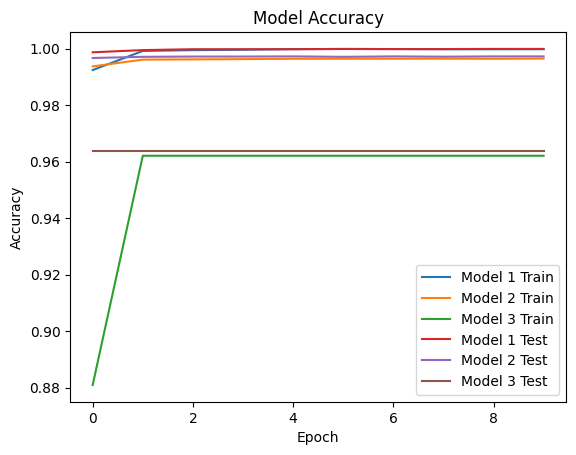

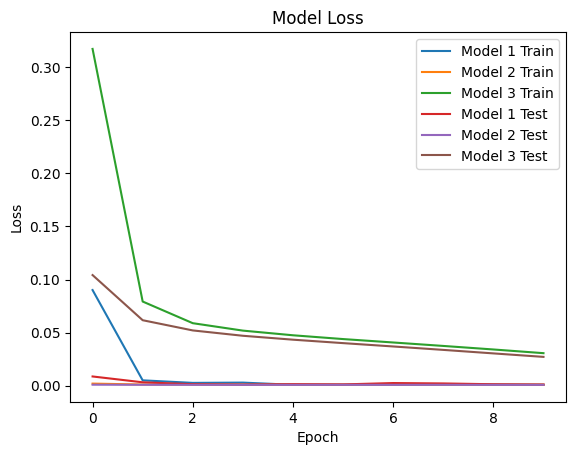

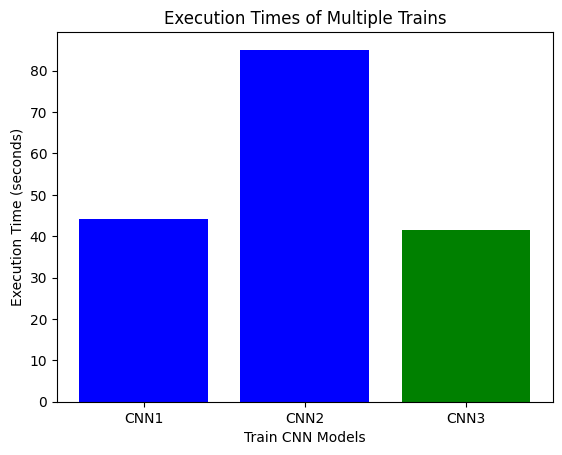

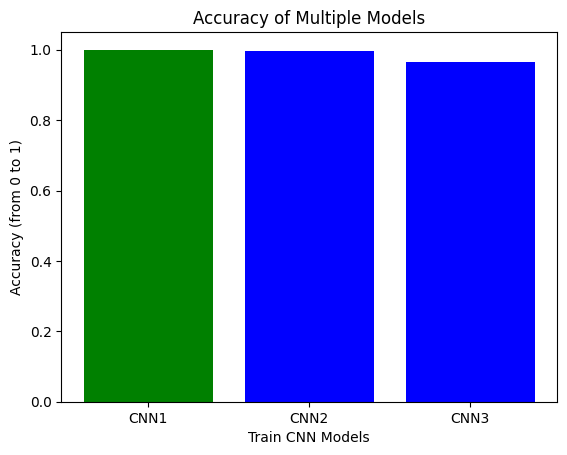

In [ ]:
# Plot the accuracy and loss curves
import matplotlib.pyplot as plt

# Evaluate the models
score1 = classifier.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test, verbose=0)
print('Model 1 - Test loss:', score1[0])
print('Model 1 - Test accuracy:', score1[1])

score2 = classifier2.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test, verbose=0)
print('Model 2 - Test loss:', score2[0])
print('Model 2 - Test accuracy:', score2[1])

score3 = classifier3.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test, verbose=0)
print('Model 3 - Test loss:', score3[0])
print('Model 3 - Test accuracy:', score3[1])

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model 1 Train', 'Model 2 Train', 'Model 3 Train', 'Model 1 Test', 'Model 2 Test', 'Model 3 Test'], loc='lower right')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Model 1 Train', 'Model 2 Train', 'Model 3 Train', 'Model 1 Test', 'Model 2 Test', 'Model 3 Test'], loc='upper right')
plt.show()

# Plot the execution times
execution_times = [execution_time1, execution_time2, execution_time3]
labels = ['CNN1', 'CNN2', 'CNN3']
colors = ['blue', 'blue', 'blue']  # Set the color for each bar

# Find the index of the model with the lowest execution time
min_execution_times_index = execution_times.index(min(execution_times))
colors[min_execution_times_index] = 'green'  # Set a different color for the bar with the execution time

plt.bar(labels, execution_times, color=colors)
plt.xlabel('Train CNN Models')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Times of Multiple Trains')
plt.show()




# Plot the accuracy
accuracy = [score1[1], score2[1], score3[1]]
labels = ['CNN1', 'CNN2', 'CNN3']
colors = ['blue', 'blue', 'blue']  # Set the color for each bar
# Find the index of the model with the highest accuracy
max_accuracy_index = accuracy.index(max(accuracy))
colors[max_accuracy_index] = 'green'  # Set a different color for the bar with the highest accuracy
plt.bar(labels, accuracy, color=colors)
plt.xlabel('Train CNN Models')
plt.ylabel('Accuracy (from 0 to 1)')
plt.title('Accuracy of Multiple Models')
plt.show()